In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/mimoriam/dl_course/master/DL%20course%20notebooks/DATA/cancer_classification.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Exploratory Data Analysis:

In [4]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


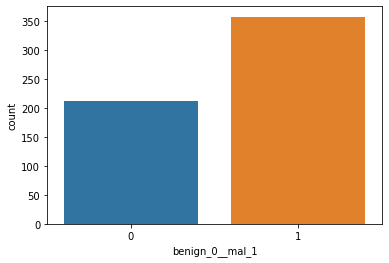

In [7]:
sns.countplot(x='benign_0__mal_1', data=df)

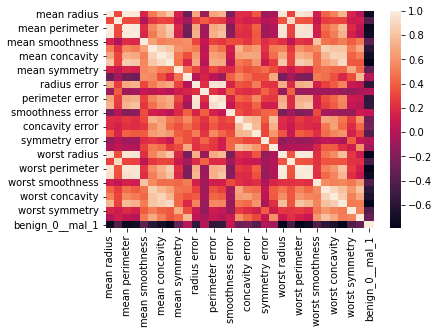

In [8]:
sns.heatmap(df.corr())

In [9]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

# Scaling & Train/Test Split:

In [10]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(X_train)

MinMaxScaler()

In [14]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [18]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [19]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30, activation='relu'))

model.add(Dense(units=15, activation='relu'))

# For a BINARY CLASSIFICATION problem:
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [20]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 1s 21ms/step - loss: 0.7028 - val_loss: 0.6833
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6638 - val_loss: 0.6499
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6335 - val_loss: 0.6166
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6007 - val_loss: 0.5831
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5664 - val_loss: 0.5405
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5215 - val_loss: 0.4940
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4789 - val_loss: 0.4487
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4357 - val_loss: 0.4102
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3987 - val_loss: 0.3681
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3598 - val_loss: 0.3292
Epoch 11

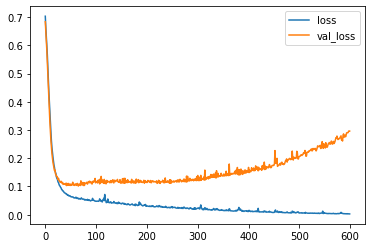

In [22]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()  # Overfitting after 400, yikes

# Example 1 - Early Stopping before the model overfits:

In [23]:
model = Sequential()
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [26]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 27ms/step - loss: 0.6845 - val_loss: 0.6620
Epoch 2/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6538 - val_loss: 0.6328
Epoch 3/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6227 - val_loss: 0.6019
Epoch 4/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5898 - val_loss: 0.5671
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5535 - val_loss: 0.5264
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5074 - val_loss: 0.4764
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4587 - val_loss: 0.4245
Epoch 8/600
14/14 [==============================] - 0s 10ms/step - loss: 0.4086 - val_loss: 0.3782
Epoch 9/600
14/14 [==============================] - 0s 11ms/step - loss: 0.3645 - val_loss: 0.3312
Epoch 10/600
14/14 [==============================] - 0s 11ms/step - loss: 0.3272 - val_loss: 0.2964
Epoch

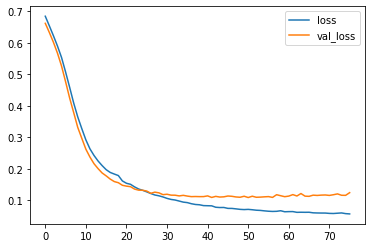

In [27]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Example 2 - Adding DropOut Layers with Early Stopping:

In [28]:
from tensorflow.keras.layers import Dropout

In [29]:
model = Sequential()
model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [30]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 2s 32ms/step - loss: 0.7303 - val_loss: 0.6938
Epoch 2/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6953 - val_loss: 0.6821
Epoch 3/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6814 - val_loss: 0.6708
Epoch 4/600
14/14 [==============================] - 0s 19ms/step - loss: 0.6714 - val_loss: 0.6546
Epoch 5/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6486 - val_loss: 0.6351
Epoch 6/600
14/14 [==============================] - 0s 13ms/step - loss: 0.6452 - val_loss: 0.6210
Epoch 7/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6315 - val_loss: 0.6009
Epoch 8/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6205 - val_loss: 0.5710
Epoch 9/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6034 - val_loss: 0.5527
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5787 - val_loss: 0.5298


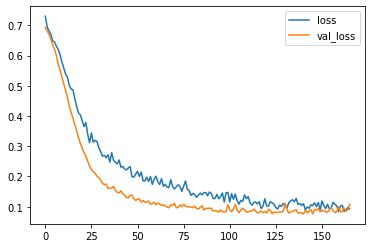

In [31]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [40]:
predictions = model.predict(X_test)
predictions

array([[9.8357058e-01],
       [9.8600513e-01],
       [9.9207532e-01],
       [1.1996925e-03],
       [9.9768329e-01],
       [9.9820077e-01],
       [9.9873185e-01],
       [1.0785993e-10],
       [9.9431086e-01],
       [9.9604791e-01],
       [2.1548118e-05],
       [9.9369442e-01],
       [9.4194824e-01],
       [9.9765146e-01],
       [7.0646583e-06],
       [9.9716651e-01],
       [9.8535609e-01],
       [9.9728382e-01],
       [6.5135891e-10],
       [2.6835114e-02],
       [9.5397389e-01],
       [9.9225771e-01],
       [9.7791970e-01],
       [9.9769825e-01],
       [8.5979183e-05],
       [9.3609262e-01],
       [1.7380913e-06],
       [9.9962509e-01],
       [2.5922814e-06],
       [3.3339858e-04],
       [9.7320408e-02],
       [4.6942951e-05],
       [4.5518780e-01],
       [7.6095551e-02],
       [9.9819255e-01],
       [9.9872696e-01],
       [2.2917986e-03],
       [9.2944801e-03],
       [6.3114146e-07],
       [6.1956384e-10],
       [1.3393164e-04],
       [9.906383

In [41]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test, predictions))

ValueError: ignored